In [2]:
import torch
import torchvision
import torch.nn as nn
from torchvision.transforms import transforms
import matplotlib.pyplot as plt
from IPython.display import Image

#### parametr

In [110]:
batch_len = 10
Alpha = 0.004
num = 10
total_number = 0
correct_number = 0

correctArr = [0 for i in range(10)]
totalArr = [0 for i in range(10)]

In [111]:
classes = ('0', '1', '2', '3','4', '5', '6', '7', '8', '9')

In [112]:
train_dataset = torchvision.datasets.MNIST(root= './data_mnist' , train=True , transform=transforms.ToTensor() , download=True)
test_dataset  = torchvision.datasets.MNIST(root='./data_mnist'  , train=False ,transform=transforms.ToTensor())

In [113]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset , shuffle=True , batch_size=batch_len)
test_loader  = torch.utils.data.DataLoader(dataset=test_dataset  , shuffle=False, batch_size=batch_len)
len(train_loader)

6000

In [114]:
dataiter = iter(train_loader)
img, _ = next(dataiter)
img.shape

torch.Size([10, 1, 28, 28])

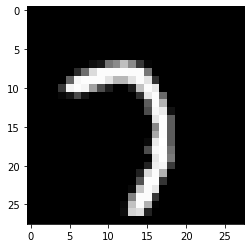

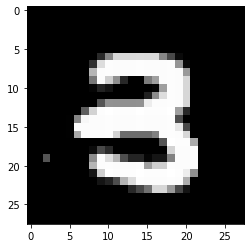

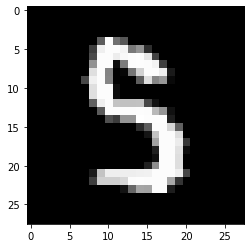

In [115]:
for i in range(3):
    plt.imshow(img[i][0] ,cmap='gray')
    plt.show()

## Cnn

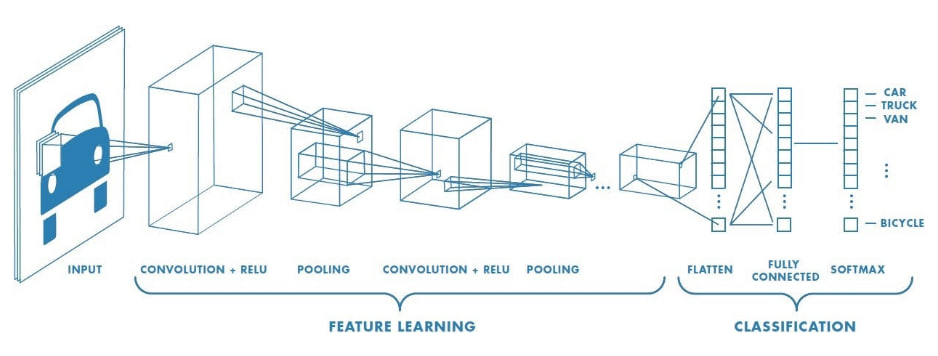

In [3]:
#picture 1
Image(filename='4.jpg')

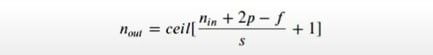

In [4]:
#picture 2
Image(filename='5.png')

In [116]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN , self).__init__()

        self.cnv1  = nn.Conv2d(in_channels=1 , out_channels=8 , kernel_size=3) 
        self.pool = nn.MaxPool2d(2,2) 
        self.cnv2  = nn.Conv2d(in_channels=8 , out_channels=12 , kernel_size=3)
        self.f1    = nn.Linear(12 * 5 * 5 , 60)
        self.f2    = nn.Linear(60 , 45)
        self.f3    = nn.Linear(45 , 30)
        self.f4    = nn.Linear(30 , 10)

    def forward(self , x):

        out = self.cnv1(x) # 28 - 3 + 1 = 26
        out = torch.relu(out) 
        out = self.pool(out)  # 26/2 = 13
        out = self.cnv2(out)  #13-3 + 1 = 11
        out = torch.relu(out)
        out = self.pool(out)  #11 / 2 = 5
        out = torch.relu(out)
        
        out = out.reshape(-1 , 12 * 5 * 5)

        out = self.f1(out)
        out = torch.relu(out)
        out = self.f2(out)
        out = torch.relu(out)
        out = self.f3(out)
        out = torch.relu(out)
        out = self.f4(out)
        out = torch.relu(out)

        return out
model = CNN()    

#*********************** Version 2 ***********************#




# class CNN2(nn.Module):
#     def __init__(self):
#         super(CNN , self).__init__()

#         self.cnv1  = nn.Conv2d(in_channels=1 , out_channels=8 , kernel_size=3) 
#         self.pool = nn.MaxPool2d(2,2) 
#         self.cnv2  = nn.Conv2d(in_channels=8 , out_channels=12 , kernel_size=3)
#         self.f1    = nn.Linear(12 * 5 * 5 , 60)
#         self.f2    = nn.Linear(60 , 45)
#         self.f3    = nn.Linear(45 , 30)
#         self.f4    = nn.Linear(30 , 10)

#     def forward(self , x):

#         out = self.cnv1(x) # 28 - 3 + 1 = 26
#         out = torch.tanh(out) 
#         out = self.pool(out)  # 26/2 = 13
#         out = self.cnv2(out)  #13-3 + 1 = 11
#         out = torch.tanh(out)
#         out = self.pool(out)  #11 / 2 = 5
#         out = torch.tanh(out)
        
#         out = out.reshape(-1 , 12 * 5 * 5)

#         out = self.f1(out)
#         out = torch.tanh(out)
#         out = self.f2(out)
#         out = torch.tanh(out)
#         out = self.f3(out)
#         out = torch.tanh(out)
#         out = self.f4(out)
#         out = torch.tanh(out)

#         return out
# model = CNN() 





#***********************************************************#



#*********************** Version 3 ***********************#




# class CNN3(nn.Module):
#     def __init__(self):
#         super(CNN , self).__init__()

#         self.cnv1  = nn.Conv2d(in_channels=1 , out_channels=8 , kernel_size=3) 
#         self.pool = nn.MaxPool2d(2,2) 
#         self.cnv2  = nn.Conv2d(in_channels=8 , out_channels=12 , kernel_size=3)
#         self.f1    = nn.Linear(12 * 5 * 5 , 60)
#         self.f2    = nn.Linear(60 , 45)
#         self.f3    = nn.Linear(45 , 30)
#         self.f4    = nn.Linear(30 , 10)

#     def forward(self , x):

#         out = self.cnv1(x) # 28 - 3 + 1 = 26
#         out = nn.ELU(out) 
#         out = self.pool(out)  # 26/2 = 13
#         out = self.cnv2(out)  #13-3 + 1 = 11
#         out = nn.ELU(out)
#         out = self.pool(out)  #11 / 2 = 5
#         out = nn.ELU(out)
        
#         out = out.reshape(-1 , 12 * 5 * 5)

#         out = self.f1(out)
#         out = nn.ELU(out)
#         out = self.f2(out)
#         out = nn.ELU(out)
#         out = self.f3(out)
#         out = nn.ELU(out)
#         out = self.f4(out)
#         out = nn.ELU(out)

#         return out
# model = CNN() 
#***********************************************************#


In [117]:
loss = nn.CrossEntropyLoss()
optim= torch.optim.Adam(params=model.parameters() , lr=Alpha)

In [118]:
cnt = 0
for i in range(num):
    for index , (img , labl) in enumerate(train_loader):
        
        prd = model(img)
        ls = loss(prd , labl)
        ls.backward()

        optim.step()
        optim.zero_grad()
        
        if (cnt % 2000== 0):
            print(cnt ,'. ' , "Loss = " , ls.item())
        cnt = cnt + 1

0 .  Loss =  2.294286012649536
2000 .  Loss =  0.7122888565063477
4000 .  Loss =  0.24002580344676971
6000 .  Loss =  0.08863300085067749
8000 .  Loss =  0.23621885478496552
10000 .  Loss =  0.0005324383964762092
12000 .  Loss =  0.24625210464000702
14000 .  Loss =  0.2342381477355957
16000 .  Loss =  0.2635619342327118
18000 .  Loss =  0.0007126298150978982
20000 .  Loss =  7.728067430434749e-05
22000 .  Loss =  0.23053261637687683
24000 .  Loss =  0.01204123068600893
26000 .  Loss =  0.2352624237537384
28000 .  Loss =  5.364411777009082e-07
30000 .  Loss =  0.9220378994941711
32000 .  Loss =  0.25481611490249634
34000 .  Loss =  0.2318599969148636
36000 .  Loss =  0.21340370178222656
38000 .  Loss =  0.5502769351005554
40000 .  Loss =  0.0155256362631917
42000 .  Loss =  0.9424392580986023
44000 .  Loss =  0.23254165053367615
46000 .  Loss =  0.23054644465446472
48000 .  Loss =  0.7232308983802795
50000 .  Loss =  1.2478386163711548
52000 .  Loss =  0.2310989797115326
54000 .  Loss =

In [119]:
with torch.no_grad():
    for img, labels in test_loader:
        pred = model(img)

        _, predict = torch.max(pred, 1)
        total_number += labels.size(0)
        correct_number += (predict == labels).sum().item()
        
        for i in range(batch_len):
            if (labels[i] == predict[i]):
                correctArr[labels[i]] += 1
            totalArr[labels[i]] += 1

    accuracy = (100.0 * (correct_number / total_number))
    print("Accuracy of the neural network is = " , accuracy,"%")

    for i in range(10):
        accuracy = 100.0 * correctArr[i] / totalArr[i]
        print("Accuracy of ",classes[i]," is : ", accuracy, "%")

Accuracy of the neural network is =  98.15 %
Accuracy of  0  is :  99.38775510204081 %
Accuracy of  1  is :  99.20704845814979 %
Accuracy of  2  is :  98.64341085271317 %
Accuracy of  3  is :  98.61386138613861 %
Accuracy of  4  is :  99.4908350305499 %
Accuracy of  5  is :  97.08520179372198 %
Accuracy of  6  is :  97.91231732776617 %
Accuracy of  7  is :  97.56809338521401 %
Accuracy of  8  is :  98.870636550308 %
Accuracy of  9  is :  94.54905847373637 %
